# This code is for generating trajectories using RatInABox: https://github.com/RatInABox-Lab/RatInABox.

## Section 1: generate 1D trajectories for head direction cells with periodic boundary conditions

    • To AUTOMATICALLY save all plots (recommended), set  `ratinabox.autosave_plots = True`
    • To MANUALLY save plots, call                        `ratinabox.utils.save_figure(figure_object, save_title).
      This warning will not be shown again
HINT: You can stylize plots to make them look like repo/paper by calling `ratinabox.stylize_plots()`
      This hint will not be shown again


FileNotFoundError: [Errno 2] No such file or directory: './traces/OneDtrajectory_dur360_speedMean0.0_speedStd0.1.npz'

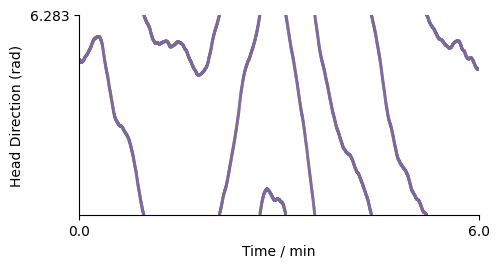

In [2]:

from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
import numpy as np
import matplotlib.pyplot as plt

Env = Environment(params={
    'scale':2*np.pi,
    "dimensionality": "1D",
    "boundary_conditions": "periodic", #periodic boundary conditions
})

dur = 360 #in seconds
dt = 0.001 #in seconds i.e., 100 Hz sampling rate 
speed_mean = 0. #in rad/s
speed_std = 0.1

Ag = Agent(Env, params = {
    "dt": dt,
    "speed_mean":speed_mean,
    "speed_std": speed_std,
    "speed_coherence_time": 20
    })


while Ag.t < dur:
    Ag.update(drift_velocity=None,drift_to_random_strength_ratio=1)

plt.Figure(figsize=(2,2), dpi=300)
Ag.plot_trajectory(t_end=900) #show the first 30 seconds of the trajectory
plt.ylabel('Head Direction (rad)')

Direction = Ag.history['pos']
Direction = np.array(Direction)-np.pi
Speed = -np.asarray(Ag.history['vel'])

# #save Head Direction and Speed as a single npz indicating dur and speed_mean
np.savez('/home/zilong/Desktop/HDPhasePrecession/HDTraj_dur'+str(dur)+'_speedMean'+str(speed_mean)+'_speedStd'+str(speed_std)+'.npz', Direction=Direction, Speed=Speed)